In [2]:
%pip install pillow
%pip install numpy
%pip install scipy
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
from PIL import Image, ImageDraw
import numpy as np
import math
from scipy import signal, ndimage
import ncc

C:\Users\kerry\AppData\Local\Temp\ipykernel_16244\2772639152.py:6: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  image = image.resize((int(image.size[0]*scale), int(image.size[1]*scale)), Image.BICUBIC)


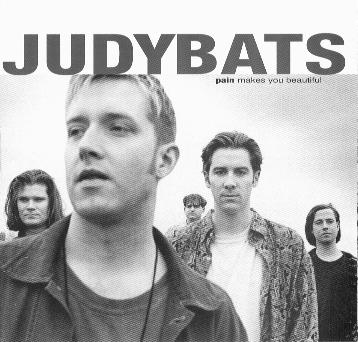

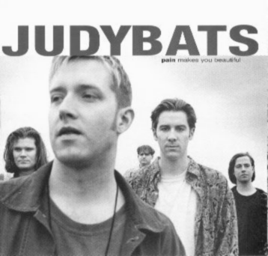

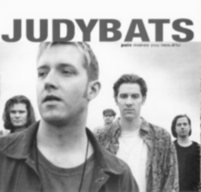

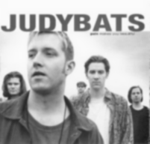

In [127]:
def MakeGaussianPyramid(image, scale=0.75, minsize=200): 
    pyramid = [np.asarray(image).astype(np.float32)] 
    while max(image.size) >= minsize: 
        image_arr = ndimage.gaussian_filter(image, sigma=1/(2*scale))
        image = Image.fromarray(image_arr)
        image = image.resize((int(image.size[0]*scale), int(image.size[1]*scale)), Image.BICUBIC)
        pyramid.append(np.asarray(image).astype(np.float32))
    return pyramid
test_img = Image.open('faces/judybats.jpg').convert('L')
pyramid = MakeGaussianPyramid(test_img)
for img in pyramid: 
    display(Image.fromarray(img.astype(np.uint8)))

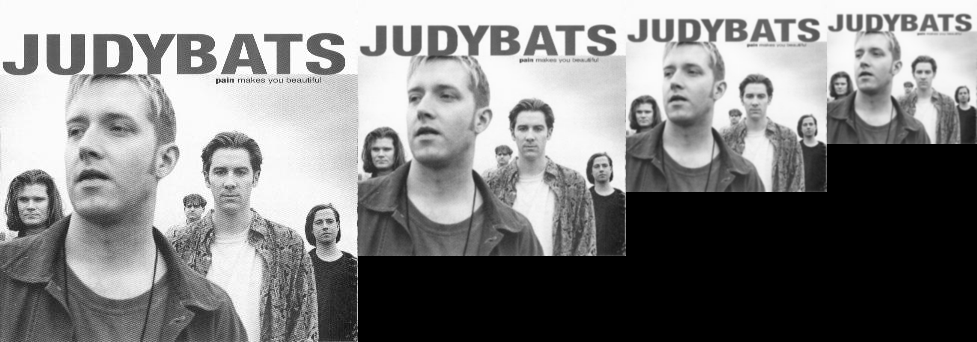

In [128]:
def ShowGaussianPyramid(pyramid): 
    width = 0
    height = 0
    for img_arr in pyramid: 
        img = Image.fromarray(img_arr.astype(np.uint8))
        width += img.size[0]
        height = max(height, img.size[1])
    result = Image.new('L', (width, height))
    x = 0
    for img_arr in pyramid: 
        img = Image.fromarray(img_arr.astype(np.uint8))
        result.paste(img, (x, 0))
        x += img.size[0]
    display(result)
ShowGaussianPyramid(pyramid)

C:\Users\kerry\AppData\Local\Temp\ipykernel_16244\730290208.py:6: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  template = Image.fromarray(template.astype(np.uint8)).resize((int(template.shape[1]*resize_ratio), int(template.shape[0]*resize_ratio)), Image.BICUBIC)


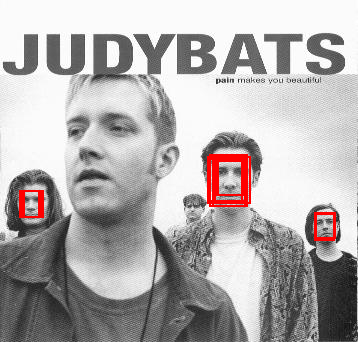

In [135]:
def findTemplate(pyramid, template): 
    original_template_size = template.shape
    # display(Image.fromarray(template.astype(np.uint8)))
    # print(template.shape)
    resize_ratio = 15/template.shape[1]
    template = Image.fromarray(template.astype(np.uint8)).resize((int(template.shape[1]*resize_ratio), int(template.shape[0]*resize_ratio)), Image.BICUBIC)
    # display(template)
    # print(template.size)
    output = Image.fromarray(pyramid[0].astype(np.uint8)).convert('RGB')
    draw = ImageDraw.Draw(output)
    for img_index in range(len(pyramid)): 
        img = Image.fromarray(pyramid[img_index].astype(np.uint8))
        corr = ncc.normxcorr2D(img, template)        
        img = img.convert('RGB')
        stage_draw = ImageDraw.Draw(img)
        # display(img)
        # display(template)
        # display(Image.fromarray((np.maximum(corr, 0) * 255).astype(np.uint8)))
        for i in range(corr.shape[0]):
            for j in range(corr.shape[1]):
                if corr[i][j] > 0.64:
                    draw.rectangle((j/0.75**(img_index) - template.size[0]/2/0.75**(img_index), i/0.75**(img_index) - template.size[1]/2/0.75**(img_index), j/0.75**(img_index) + template.size[0]/2/0.75**(img_index), i/0.75**(img_index) + template.size[1]/2/0.75**(img_index)), outline='red', width=2)
                    stage_draw.rectangle((j - original_template_size[1]/2, i - original_template_size[0]/2, j + original_template_size[1]/2, i + original_template_size[0]/2), outline='red', width=2)
        # display(img)
    display(output)
findTemplate(pyramid, np.asarray(Image.open('faces/template.jpg').convert('L')))

C:\Users\kerry\AppData\Local\Temp\ipykernel_16244\2772639152.py:6: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  image = image.resize((int(image.size[0]*scale), int(image.size[1]*scale)), Image.BICUBIC)


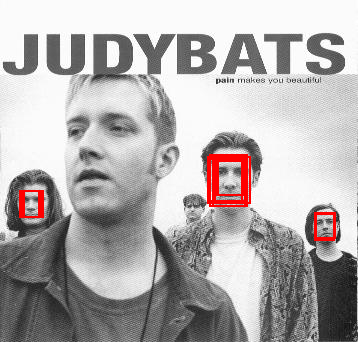

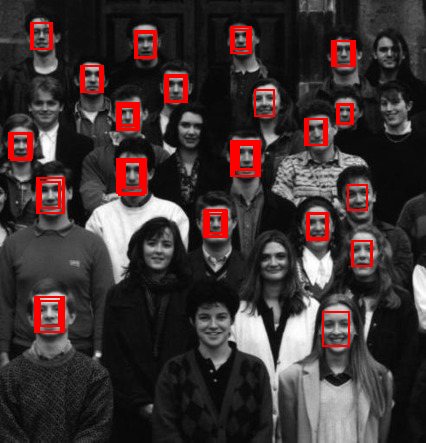

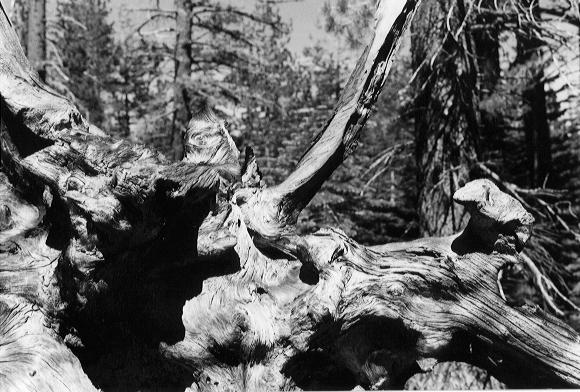

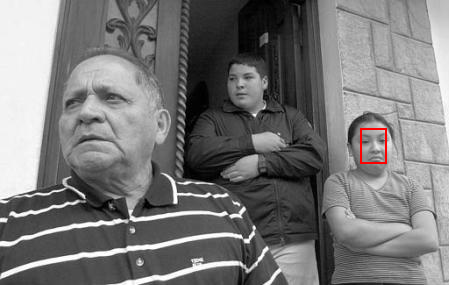

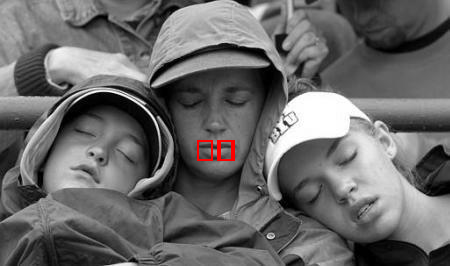

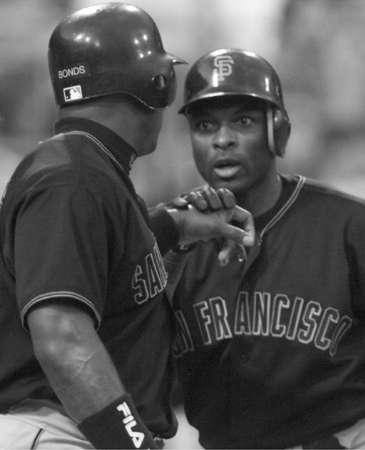

In [136]:
findTemplate(MakeGaussianPyramid(Image.open('faces/judybats.jpg').convert('L')), np.asarray(Image.open('faces/template.jpg').convert('L')))
findTemplate(MakeGaussianPyramid(Image.open('faces/students.jpg').convert('L')), np.asarray(Image.open('faces/template.jpg').convert('L')))
findTemplate(MakeGaussianPyramid(Image.open('faces/tree.jpg').convert('L')), np.asarray(Image.open('faces/template.jpg').convert('L')))
findTemplate(MakeGaussianPyramid(Image.open('faces/family.jpg').convert('L')), np.asarray(Image.open('faces/template.jpg').convert('L')))
findTemplate(MakeGaussianPyramid(Image.open('faces/fans.jpg').convert('L')), np.asarray(Image.open('faces/template.jpg').convert('L')))
findTemplate(MakeGaussianPyramid(Image.open('faces/sports.jpg').convert('L')), np.asarray(Image.open('faces/template.jpg').convert('L')))

In [116]:
#TODO Precision Recall calculations

(307, 375, 3)


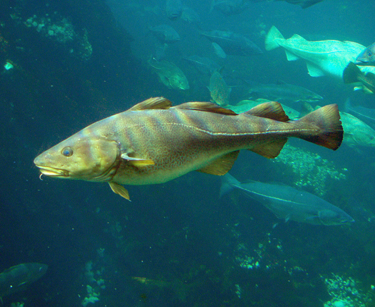

C:\Users\kerry\AppData\Local\Temp\ipykernel_16244\2772639152.py:6: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  image = image.resize((int(image.size[0]*scale), int(image.size[1]*scale)), Image.BICUBIC)


In [137]:
def MakeLaplacianPyramid(image, scale, minsize): 
    img = np.asarray(image)
    print(img.shape)
    display(Image.fromarray(img))
    gauss_pyramid = [MakeGaussianPyramid(Image.fromarray(img[:,:,i])) for i in range(3) ]
    laplace_pyramid = [img[:,:,0]] 
    for i in range(len(gauss_pyramid)): 
        image_arr = ndimage.gaussian_filter(image, sigma=1/(2*scale))
        image = Image.fromarray(image_arr)
        image = image.resize((int(image.size[0]*scale), int(image.size[1]*scale)), Image.BICUBIC)
        laplace_pyramid.append(gauss_pyramid[i] - np.asarray(image).astype(np.float32))
    return pyramid
MakeLaplacianPyramid(Image.open('../assignment1/3a_fish.bmp'), 1, 1)